# 0.1 imports

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 0.2 helpers functions

In [52]:
# def plot_gdp(dataframe, countrys, print_legend=True):
    
#     countrys_with_year = countrys + ['year']
#     df=dataframe[countrys_with_year].copy()
#     # Create a list of colors
#     color_discrete_sequence = [
#         'navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
#         'forestgreen', 'steelblue',
#     ]

#     # Create a list of traces
#     traces = []
#     for j, seleccion in enumerate(countrys):
#         trace = go.Scatter(
#             x=df['year'],
#             y=df[seleccion],
#             mode='lines+markers',
#             name=seleccion,
#             marker=dict(color=color_discrete_sequence[j % len(color_discrete_sequence)]),
#         )
#         traces.append(trace)

#     # Create the figure
#     fig = go.Figure(traces)

#     # Configure the layout
#     fig.update_layout(
#         title='GDP',
#         title_font_size=30,
#         plot_bgcolor='#F7FAFC',
#         xaxis=dict(tickangle=30),
#         yaxis=dict(tickformat=',.0f'),
#         xaxis_dtick='2',
#         xaxis_title='Year',
#         yaxis_title='Real GDP growth (Annual percent change)',
#         legend_title_text='Legend',
#         legend=dict(x=0, y=1) if print_legend == True else {},
#         showlegend=True if print_legend == True else False,
#         margin=dict(l=0, r=0, t=50, b=0),
#         template='plotly',
#         height=800,
#         width=1200,
#     )

#     return fig


In [53]:
def plot_gdp(dataframe, countrys, print_legend=True):
    countrys_with_year = countrys + ['year']
    df = dataframe[countrys_with_year].copy()

    color_palette = [
        'navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
        'forestgreen', 'steelblue',
    ]
    
    plt.figure(figsize=(12, 8))

    for seleccion in countrys:
        sns.lineplot(x='year', y=seleccion, data=df, label=seleccion)#, color=color_palette[j % len(color_palette)])

    plt.title('GDP', fontsize=20)
    plt.xlabel('Year')
    plt.ylabel('Real GDP growth (Annual percent change)')
    plt.xticks(rotation=30)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
    
    if print_legend:
        plt.legend(title='Legend', loc='upper left')
    else:
        plt.legend().set_visible(False)
    
    plt.tight_layout()
    plt.grid()
    plt.show()

In [54]:

def fill_individual_countries(dataframe, countries):
    
    df = dataframe[countries+['year']].copy()

    check_na = df.isna().sum()
    null_values = list(check_na[check_na>0].index)

    complete_group = list(check_na[check_na==0].index)
    complete_group.remove('year')
    # complete_group.remove('Sub-Saharan Africa (Region) ')

    df_complete_group = dataframe[complete_group]

    df_aux = pd.DataFrame()

    df_aux["year"] = dataframe["year"]
    df_aux["year_average"] = df_complete_group.mean(axis=1)


    for country in null_values:

        df_aux[country] = dataframe[country]

        aux = df_aux[~df_aux[country].isna()]

        aux['test'] = (aux[country] > aux['year_average']).astype(int)


        most_common = aux['test'].value_counts().idxmax()

        if most_common == 0:
            df_aux.loc[df_aux[country].isna(), country] = df_aux.loc[df_aux[country].isna(), "year_average"] - df_aux[country].std()
        else:
            df_aux.loc[df_aux[country].isna(), country] = df_aux.loc[df_aux[country].isna(), "year_average"] + df_aux[country].std()

    return df_aux

In [55]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [56]:

def metrics(y_true, y_pred,model_name):
    y_true = y_true.values
    y_pred = y_pred.values
    mae = round(mean_absolute_error(y_true, y_pred),5)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)),5)
    mape = round(mean_absolute_percentage_error(y_true, y_pred),5)
    metrics = pd.DataFrame({'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape}, index=[0])
    return metrics



# 0.3 load data

In [57]:
path = '/home/lavino/Documentos/projetos_indicium/ds_desafio/'

In [58]:
df_raw = pd.read_csv(path + 'data/df_fill.csv', index_col='year', parse_dates=True)
df_raw.shape

(49, 228)

In [59]:
df_raw = df_raw.asfreq(freq='AS')

# 1.0 Season decomposition - additive model

In [60]:
# country = 'Albania'
# country = 'Sub-Saharan Africa (Region) '
# country = 'Argentina'
country = 'United States'

## 1.1 plot

/tmp/ipykernel_51930/4242940995.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


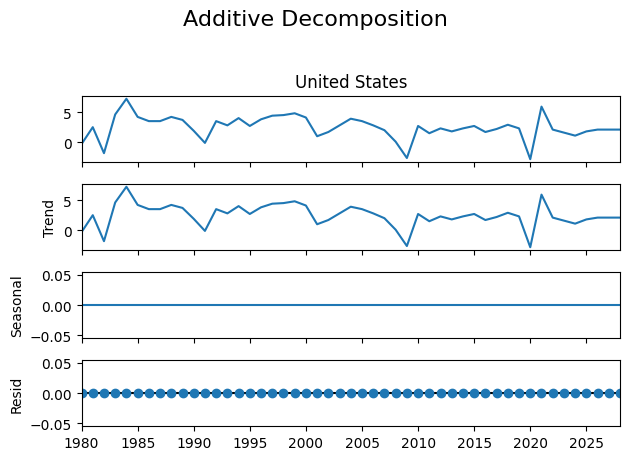

In [61]:
decomposition = seasonal_decompose(
    df_raw[country], 
    model='additive',
)

decomposition.plot().suptitle('Additive Decomposition', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

In [64]:
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Supondo que df_raw é o seu dataframe contendo os dados de vários países
# e que os nomes dos países estão na coluna 'country'

# Criar a pasta 'images' se ela ainda não existir
if not os.path.exists(path + 'images'):
    os.makedirs('images')

# Iterar através dos países
for country in df_raw.columns:
    # Filtrar os dados para o país atual
    country_data = df_raw[country]
    
    # Realizar a decomposição sazonal
    decomposition = seasonal_decompose(country_data, model='additive')
    
    # Plotar e salvar a imagem
    plt.figure(figsize=(10, 6))
    decomposition.plot()
    plt.suptitle(f'Additive Decomposition for {country}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(path + f'images/{country}_decomposition.png')
    plt.close()  # Fechar a figura para liberar memória


/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_51930/52817629.py:24: UserWarning: The figure layout h

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## 1.2 adf test

In [29]:
stacionary_data = []
non_stacionary_data = []

for series in df_raw.columns:

    country_data = df_raw[[series]]

    # Realizando o teste ADF
    result = adfuller(country_data)

    # Interpretando os resultados do teste
    # print('ADF Statistic:', result[0])
    # print('p-value:', result[1])
    # print('Critical Values:', result[4])

    if result[1] <= 0.05:
        # print("A série é estacionária.")
        stacionary_data.append(series)
    else:
        # print("A série não é estacionária.")
        non_stacionary_data.append(series)


In [30]:
print("% das series temporais estácionárias:",(len(stacionary_data)/len(df_raw.columns)*100))
print("% das series temporais não estácionárias:",(len(non_stacionary_data)/len(df_raw.columns)*100))

% das series temporais estácionárias: 81.14035087719299
% das series temporais não estácionárias: 18.859649122807017


In [31]:
len(non_stacionary_data)

43

# 2.0 Models

In [32]:
df1 = df_raw.copy()

## 2.1 test train split

In [33]:
test_years = 5
train = df1[:-test_years]
test = df1[-test_years:]

## 2.2 exponencial smoothing

In [34]:
# exponential smoting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
model_hot_winter = ExponentialSmoothing(
    train[country],
    trend='add',
    seasonal='add',
    seasonal_periods=12,
).fit()

In [36]:
pred_hot_winter = model_hot_winter.forecast(test.shape[0])

<Axes: xlabel='year'>

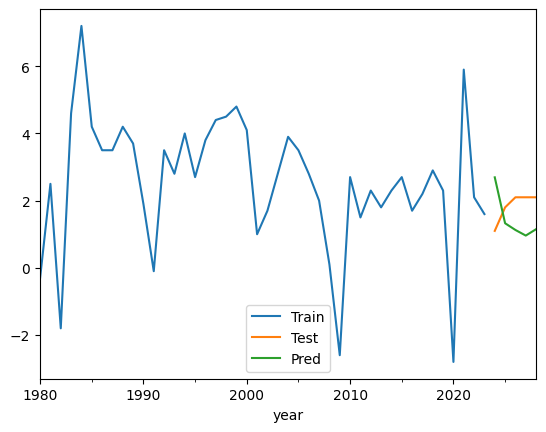

In [37]:
train[country].plot(legend=True, label='Train')
test[country].plot(legend=True, label='Test')
pred_hot_winter.plot(legend=True, label='Pred')

In [38]:
metrics(test[country], pred_hot_winter, 'Holt-Winters')

,Model,mae,rmse,mape
0,Holt-Winters,1.02576,1.08725,63.39474


## 2.2 Simple exponential smoothing

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [40]:
# simple exponetial smooting
model_ses = SimpleExpSmoothing(
    train[country],
    initialization_method='heuristic',                              
).fit(smoothing_level=0.2, optimized=True)

pred_ses = model_ses.forecast(test.shape[0])

/home/lavino/Documentos/projetos_indicium/ds_desafio/venv/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='year'>

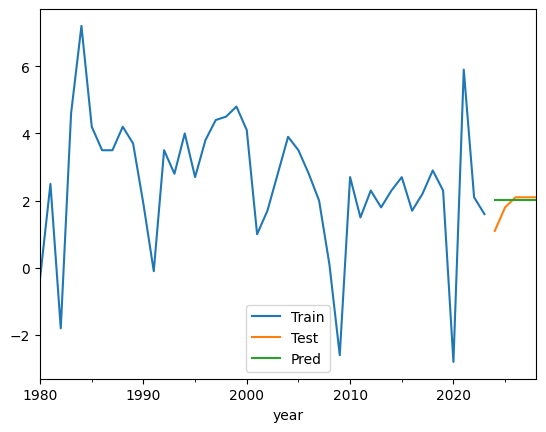

In [41]:
train[country].plot(legend=True, label='Train')
test[country].plot(legend=True, label='Test')
# pred_hot_winter.plot(legend=True, label='Pred')
pred_ses.plot(legend=True, label='Pred')

In [42]:
metrics_ses = metrics(test[country], pred_ses, 'Simple Exponential Smoothing')
metrics_ses

,Model,mae,rmse,mape
0,Simple Exponential Smoothing,0.27402,0.43181,21.46457


## 2.3 Sarimax

In [43]:
from pmdarima.arima import auto_arima

In [44]:
model_sarimax = auto_arima(
    train[country],
    m=1,
    test='adf',
    seasonal=False,
    stepwise=True,
    d=0,
    start_p=0,
    max_p=1,
    start_q=0,
    max_q=1,
)

In [45]:
pred_sarimax = model_sarimax.predict(test.shape[0])
pred_sarimax

2024-01-01    2.547727
2025-01-01    2.547727
2026-01-01    2.547727
2027-01-01    2.547727
2028-01-01    2.547727
Freq: AS-JAN, dtype: float64

<Axes: xlabel='year'>

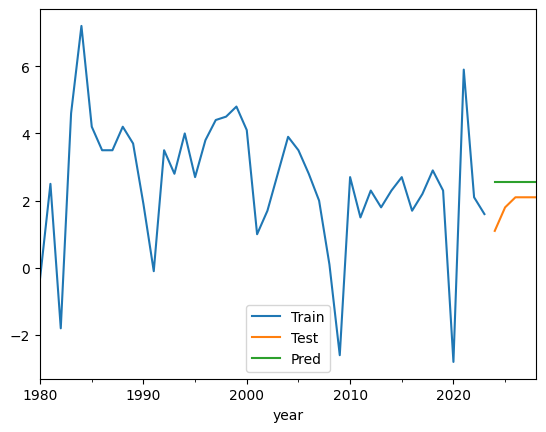

In [46]:
train[country].plot(legend=True, label='Train')
test[country].plot(legend=True, label='Test')
pred_sarimax.plot(legend=True, label='Pred')

In [47]:
metrics_sarimax = metrics(test[country], pred_sarimax, 'sarimax')
metrics_sarimax

,Model,mae,rmse,mape
0,sarimax,0.70773,0.80702,47.4226


## 2.4 Prophet

In [48]:
from prophet import Prophet
from prophet.diagnostics import cross_validation

/home/lavino/Documentos/projetos_indicium/ds_desafio/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


20:38:02 - cmdstanpy - INFO - Chain [1] start processing


20:38:02 - cmdstanpy - INFO - Chain [1] done processing


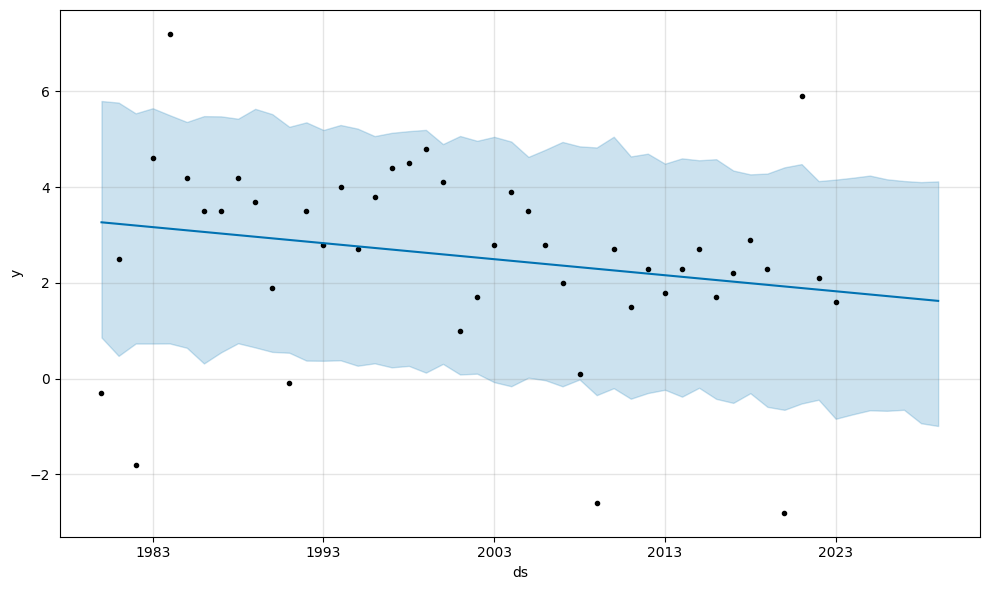

In [49]:

aux = train[[country]].copy()
aux['ds'] = aux.index
aux.rename(columns={country: 'y'}, inplace=True)
aux

# # Crie e ajuste o modelo
model_prophet = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=0,
)
model_prophet.fit(aux)


future = model_prophet.make_future_dataframe(periods=6, freq='YS')  
forecast = model_prophet.predict(future)


model_prophet.plot(forecast);

<Axes: xlabel='year'>

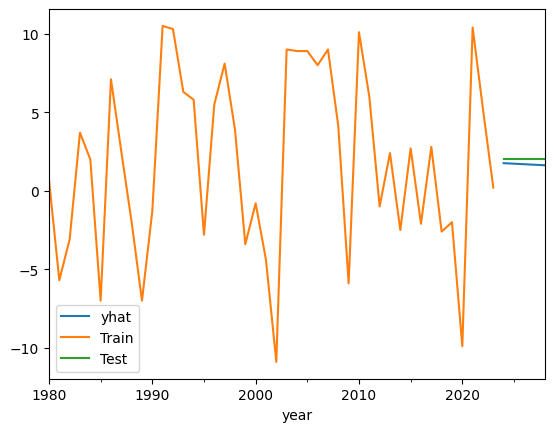

In [50]:
aux = forecast[['yhat']][-5:]
aux.index = test.index

aux.plot(legend=True, label='prophet');
train['Argentina'].plot(legend=True, label='Train')
test['Argentina'].plot(legend=True, label='Test')

In [51]:
metrics_prophet = metrics(test[country], aux['yhat'], 'prophet')
metrics_prophet

,Model,mae,rmse,mape
0,prophet,0.41149,0.4531,25.41923


In [52]:
df_cv = cross_validation(model_prophet, initial='365 days', parallel='processes', horizon='1825 days') 

20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing
20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1]

In [53]:
metrics_prophet_cv = metrics(df_cv.y, df_cv.yhat, 'Prophet CV')
metrics_prophet_cv

,Model,mae,rmse,mape
0,Prophet CV,2.03601,2.87564,315.90718


# 3.0 Exogen variables

## 3.1 Sarimax

In [54]:
# exog = df1[['South America','World']]
# exog = df1[['South America']]
exog = df1[['World']]
train_exog = exog[:-test_years]
test_exog = exog[-test_years:]

In [55]:
model_sarimax = auto_arima(
    y=train[country],
    X=train_exog,
    m=12,
    test='adf',
    seasonal=False,
    stepwise=True,
    d=0,
    start_p=0,
    max_p=1,
    start_q=0,
    max_q=1,
)

/home/lavino/Documentos/projetos_indicium/ds_desafio/venv/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [56]:
pred_sarimax = model_sarimax.predict(test.shape[0],X=test_exog)
pred_sarimax

2024-01-01    1.962300
2025-01-01    2.245988
2026-01-01    2.291254
2027-01-01    2.216334
2028-01-01    2.130122
Freq: AS-JAN, dtype: float64

<Axes: xlabel='year'>

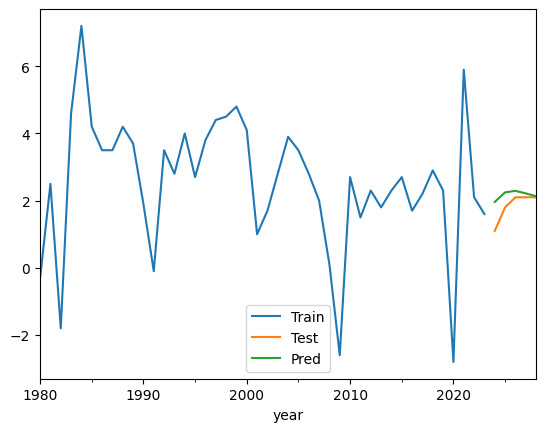

In [57]:
train[country].plot(legend=True, label='Train')
test[country].plot(legend=True, label='Test')
pred_sarimax.plot(legend=True, label='Pred')

In [58]:
metrics_sarimax = metrics(test[country], pred_sarimax, 'sarimax')
metrics_sarimax

,Model,mae,rmse,mape
0,sarimax,0.3292,0.44575,23.84989


## 3.2 Prophet

In [59]:
df2 = df1.copy()

In [60]:
df2['ds'] = df2.index

In [61]:
test_years = 5
train_pp = df2[:-test_years]
test_pp = df2[-test_years:]

20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing


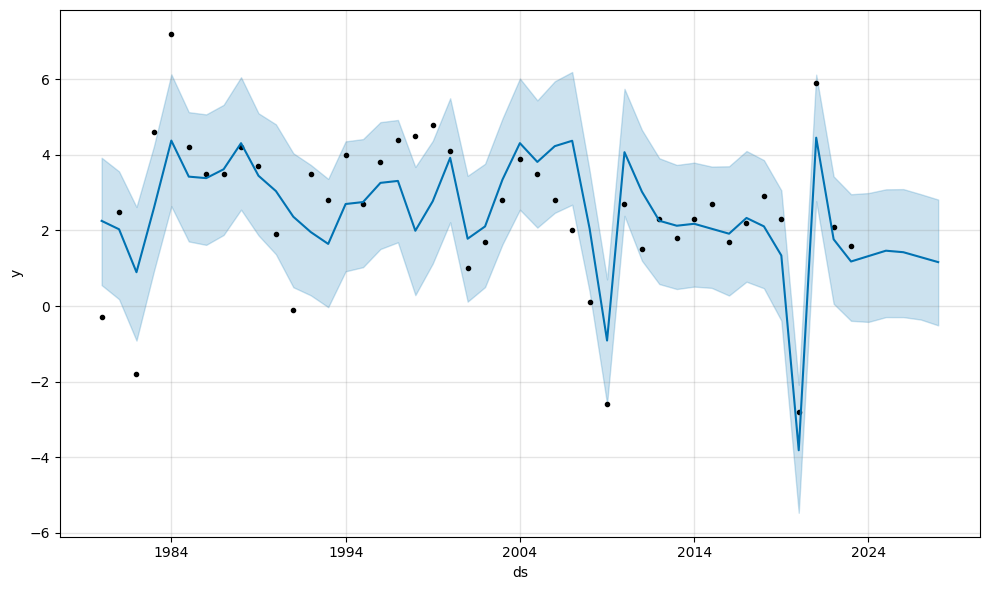

In [62]:

aux = pd.DataFrame()
aux['ds'] = df2['ds'].values
aux['y'] = df2[country].values
aux['World'] = df2['World'].values
# aux['South America'] = df2['South America'].values

test_years = 5
train_pp = aux[:-test_years]
test_pp = aux[-test_years:]

# Crie e ajuste o modelo
model_prophet = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=0,
)
model_prophet.add_regressor('World')
# model_prophet.add_regressor('South America')
model_prophet.fit(train_pp)


future = model_prophet.make_future_dataframe(periods=test_years, freq='YS')  

# future = pd.concat([future, aux[['World','South America']]], axis=1)
future = pd.concat([future, aux[['World']]], axis=1)


forecast = model_prophet.predict(future)


model_prophet.plot(forecast);

<Axes: xlabel='year'>

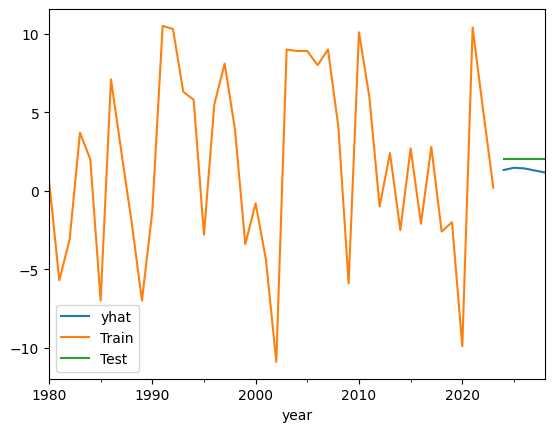

In [63]:
aux = forecast[['yhat']][-5:]
aux.index = test.index

aux.plot(legend=True, label='prophet');
train['Argentina'].plot(legend=True, label='Train')
test['Argentina'].plot(legend=True, label='Test')


In [64]:
metrics_prophet = metrics(test[country], aux['yhat'], 'prophet')
metrics_prophet

,Model,mae,rmse,mape
0,prophet,0.59486,0.65472,30.78452


In [65]:
from prophet.diagnostics import cross_validation

In [66]:
df_cv = cross_validation(model_prophet, initial='365 days', parallel='processes', horizon='1825 days') 

20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing


20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:07 - cmdstanpy - INFO - Chain [1] 

In [67]:

metrics_prophet_cv = metrics(df_cv.y, df_cv.yhat, 'Prophet CV')
metrics_prophet_cv

,Model,mae,rmse,mape
0,Prophet CV,2.13831,2.89101,135.98402


# 4.0 All countrys

In [68]:
df3 = df_raw.copy()

In [69]:
test_years = 5
train = df3[:-test_years]
test = df3[-test_years:]

## 4.1 Sarimax

In [70]:
df_pred_sarimax = pd.DataFrame()
for country in df3.columns:
    
    model_sarimax = auto_arima(
        train[country],
        m=1,
        test='adf',
        seasonal=False,
        stepwise=True,
        d=0,
        start_p=0,
        max_p=1,
        start_q=0,
        max_q=1,
    )
    
    pred_sarimax = model_sarimax.predict(test.shape[0])
    # df_pred_sarimax[country] = pred_sarimax
    df_pred_sarimax = pd.concat([df_pred_sarimax, pd.DataFrame(pred_sarimax, columns=[country])], axis=1)

In [71]:
df_pred_sarimax.index = test.index
df_pred_sarimax

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
2024-01-01,5.630638,3.738784,2.438544,0.552562,4.048752,3.889696,1.811364,3.734812,3.373297,3.560694,...,1.521734,4.033711,1.896477,1.834091,2.434091,2.086364,3.043934,2.840807,3.581051,3.361364
2025-01-01,5.630638,2.832769,2.385327,0.234865,4.359105,3.386085,1.811364,2.536149,3.478765,2.707185,...,1.693720,4.063896,1.896477,1.834091,2.434091,2.086364,3.122802,2.885693,3.570726,3.361364
2026-01-01,5.630638,2.832769,2.367787,0.099829,4.534628,3.386085,1.811364,1.722189,3.576063,3.230111,...,1.785656,4.089312,1.896477,1.834091,2.434091,2.086364,3.166017,2.927978,3.565100,3.361364
2027-01-01,5.630638,2.832769,2.362005,0.042432,4.633897,3.386085,1.811364,1.169464,3.665824,2.909726,...,1.834801,4.110713,1.896477,1.834091,2.434091,2.086364,3.189697,2.967814,3.562034,3.361364
2028-01-01,5.630638,2.832769,2.360099,0.018036,4.690040,3.386085,1.811364,0.794132,3.748632,3.106019,...,1.861072,4.128732,1.896477,1.834091,2.434091,2.086364,3.202672,3.005342,3.560364,3.361364


In [72]:

def metrics(y_true, y_pred,model_name, country):
    y_true = y_true.values
    y_pred = y_pred.values
    mae = round(mean_absolute_error(y_true, y_pred),5)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)),5)
    mape = round(mean_absolute_percentage_error(y_true, y_pred),5)
    metrics = pd.DataFrame({'Country':country,'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape}, index=[0])
    return metrics



In [73]:
df_metrics_sarimax = pd.DataFrame()
for country in df_pred_sarimax.columns:
    metrics_sarimax = metrics(test[country], df_pred_sarimax[country], 'sarimax',country)
    df_metrics_sarimax = pd.concat([df_metrics_sarimax, metrics_sarimax], axis=0)

In [74]:
df_metrics_sarimax.sort_values(by='mae', ascending=False).head(20)

,Country,Model,mae,rmse,mape
0,Macao SAR,sarimax,20.56955,22.15063,348.18255
0,Guyana,sarimax,20.33332,24.30388,562.48424
0,Libya,sarimax,7.73532,8.93492,118.99196
0,Yemen,sarimax,5.47565,5.73726,102.65598
0,Vietnam,sarimax,5.34312,5.34976,79.09161
0,Mozambique,sarimax,4.78591,6.59009,36.45871
0,Bosnia and Herzegovina,sarimax,4.59277,4.81009,153.09224
0,Sierra Leone,sarimax,4.34488,4.41786,91.76839
0,West Bank and Gaza,sarimax,4.31275,4.32375,198.92813
0,Moldova,sarimax,4.17665,4.19652,84.69639


<Axes: >

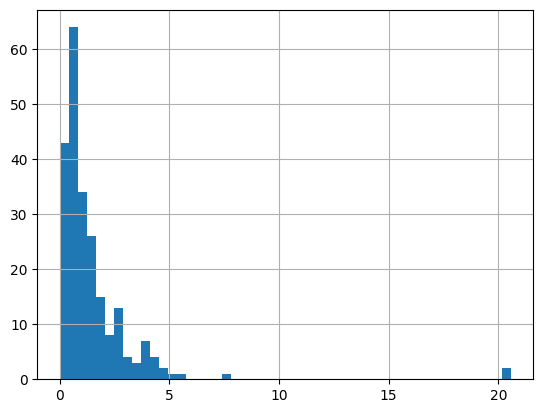

In [75]:
df_metrics_sarimax['mae'].hist(bins=50)

In [76]:
df_metrics_sarimax['mae'].agg(['mean','median','std'])

mean      1.482224
median    0.898300
std       2.156974
Name: mae, dtype: float64

## 4.2 Simple smothing

In [77]:
df_pred_ss = pd.DataFrame()
for country in df3.columns:

    # simple exponetial smooting
    model_ses = SimpleExpSmoothing(
        train[country],
        initialization_method='estimated',                              
    ).fit(smoothing_level=0.7, optimized=True)
# heuristic 
    pred_ses = model_ses.forecast(test.shape[0])
    df_pred_ss = pd.concat([df_pred_ss, pd.DataFrame(pred_ses, columns=[country])], axis=1)

In [78]:
df_metrics_ss = pd.DataFrame()
for country in df_pred_ss.columns:
    metrics_ss = metrics(test[country], df_pred_ss[country], 'simple smothing',country)
    df_metrics_ss = pd.concat([df_metrics_ss, metrics_ss], axis=0)

In [79]:
df_metrics_ss.sort_values(by='mae', ascending=False).head(20)

,Country,Model,mae,rmse,mape
0,Macao SAR,simple smothing,27.73445,28.49951,605.59178
0,Guyana,simple smothing,24.49126,29.50096,687.01419
0,Sri Lanka,simple smothing,6.43806,6.46676,253.37240
0,Ukraine,simple smothing,6.20001,6.20001,295.87922
0,Caribbean,simple smothing,6.14876,6.39390,203.96997
0,Yemen,simple smothing,5.65466,5.92581,105.83273
0,Mozambique,simple smothing,5.15503,6.85629,41.29928
0,Libya,simple smothing,4.61330,4.88763,86.75301
0,The Bahamas,simple smothing,4.14862,4.15007,260.88570
0,Ireland,simple smothing,4.14520,4.16561,128.10331


<Axes: >

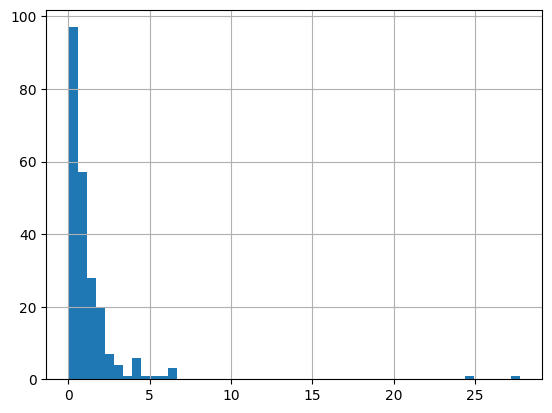

In [80]:
df_metrics_ss['mae'].hist(bins=50)

In [81]:
df_metrics_ss['mae'].agg(['mean','median','std'])

mean      1.288721
median    0.697400
std       2.617642
Name: mae, dtype: float64

## 4.3 Prophet

In [82]:

df_pred_prophet = pd.DataFrame()

for country in df3.columns:
    aux = train[[country]].copy()
    aux['ds'] = aux.index
    aux.rename(columns={country: 'y'}, inplace=True)
    aux

    # # Crie e ajuste o modelo
    model_prophet = Prophet(
        growth='linear',
        seasonality_mode='additive',
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.1,
        seasonality_prior_scale=0,
    )
    model_prophet.fit(aux)


    future = model_prophet.make_future_dataframe(periods=test.shape[0], freq='YS')  
    forecast = model_prophet.predict(future)
    df_pred_prophet = pd.concat([df_pred_prophet, pd.DataFrame(forecast[['yhat']][-5:].values, columns=[country])], axis=1)

20:38:51 - cmdstanpy - INFO - Chain [1] start processing


20:38:51 - cmdstanpy - INFO - Chain [1] done processing
20:38:51 - cmdstanpy - INFO - Chain [1] start processing
20:38:51 - cmdstanpy - INFO - Chain [1] done processing
20:38:51 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:52 - cmdstanpy - INFO - Chain [1] done processing
20:38:53 - cmdstanpy - INFO - Chain [1] 

In [83]:
df_metrics_prophet = pd.DataFrame()
for country in df_pred_prophet.columns:
    metrics_prophet = metrics(test[country], df_pred_prophet[country], 'phophet',country)
    df_metrics_prophet = pd.concat([df_metrics_prophet, metrics_prophet], axis=0)

In [84]:
df_metrics_prophet.sort_values(by='mae', ascending=False).head(20)

,Country,Model,mae,rmse,mape
0,Guyana,phophet,18.71707,19.18704,317.52606
0,Equatorial Guinea,phophet,7.85506,8.90264,437.69437
0,Azerbaijan,phophet,7.60160,7.62054,296.96489
0,Venezuela,phophet,6.77428,7.02723,706.45319
0,Tajikistan,phophet,6.72677,6.75902,165.04951
0,Macao SAR,phophet,6.36106,8.83559,71.30168
0,Iraq,phophet,6.20063,6.21738,254.36364
0,Republic of South Sudan,phophet,6.17700,6.22513,137.60980
0,Turkmenistan,phophet,6.00388,6.01382,260.30076
0,Qatar,phophet,6.00219,6.02448,215.54076


<Axes: >

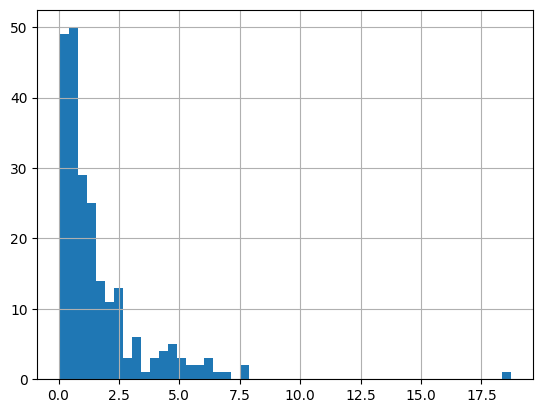

In [85]:
df_metrics_prophet['mae'].hist(bins=50)

In [86]:
df_final_metrics = pd.DataFrame()

metric = 'mae'

statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max',
]
df_final_metrics = pd.concat([df_final_metrics, df_metrics_prophet[metric].agg(statistics)], axis=1)

# add simples smothing
df_final_metrics = pd.concat([df_final_metrics, df_metrics_ss[metric].agg([statistics])], axis=1)

# add sarimax
df_final_metrics = pd.concat([df_final_metrics, df_metrics_sarimax[metric].agg([statistics])], axis=1)

df_final_metrics.columns = ['prophet','simple_smoothing','sarimax']

df_final_metrics = df_final_metrics.T

df_final_metrics['cv'] = df_final_metrics['std'] / df_final_metrics['mean']  

df_final_metrics.style.highlight_min(color='lightgreen', axis=0)
# df_final_metrics

,mean,median,std,min,max,cv
prophet,1.642346,1.003945,1.961299,0.055700,18.717070,1.194206
simple_smoothing,1.288721,0.697400,2.617642,0.019480,27.734450,2.031194
sarimax,1.482224,0.898300,2.156974,0.000000,20.569550,1.455228


In [87]:
df_final_metrics = pd.DataFrame()

metric = 'rmse'

statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max',
]
df_final_metrics = pd.concat([df_final_metrics, df_metrics_prophet[metric].agg(statistics)], axis=1)

# add simples smothing
df_final_metrics = pd.concat([df_final_metrics, df_metrics_ss[metric].agg([statistics])], axis=1)

# add sarimax
df_final_metrics = pd.concat([df_final_metrics, df_metrics_sarimax[metric].agg([statistics])], axis=1)

df_final_metrics.columns = ['prophet','simple_smoothing','sarimax']

df_final_metrics = df_final_metrics.T

df_final_metrics['cv'] = df_final_metrics['std'] / df_final_metrics['mean']  

df_final_metrics.style.highlight_min(color='lightgreen', axis=0)
# df_final_metrics

,mean,median,std,min,max,cv
prophet,1.726555,1.032785,2.052355,0.080230,19.187040,1.188699
simple_smoothing,1.379727,0.745805,2.881058,0.019480,29.500960,2.088136
sarimax,1.598677,0.971070,2.431278,0.000000,24.303880,1.520806


In [88]:
df_final_metrics = pd.DataFrame()

metric = 'mape'

statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max',
]
df_final_metrics = pd.concat([df_final_metrics, df_metrics_prophet[metric].agg(statistics)], axis=1)

# add simples smothing
df_final_metrics = pd.concat([df_final_metrics, df_metrics_ss[metric].agg([statistics])], axis=1)

# add sarimax
df_final_metrics = pd.concat([df_final_metrics, df_metrics_sarimax[metric].agg([statistics])], axis=1)

df_final_metrics.columns = ['prophet','simple_smoothing','sarimax']

df_final_metrics = df_final_metrics.T

df_final_metrics['cv'] = df_final_metrics['std'] / df_final_metrics['mean']  

df_final_metrics.style.highlight_min(color='lightgreen', axis=0)
# df_final_metrics

,mean,median,std,min,max,cv
prophet,57.816669,32.222000,76.873557,0.936100,706.453190,1.329609
simple_smoothing,46.013746,22.037015,82.442300,0.695720,687.014190,1.791688
sarimax,46.247781,31.770445,54.678141,0.000000,562.484240,1.182287


# 5.0 cross validation

## 5.1 Simple smothing

mean mae for all countrys 3.7541548752331964
median mae for all countrys 3.0548487775568036
std mae for all countrys 2.375351945163901
std mae for all countrys 21.960004251189652
std mae for all countrys 1.0535072712366245
cv mae for all countrys 0.6327261458589536


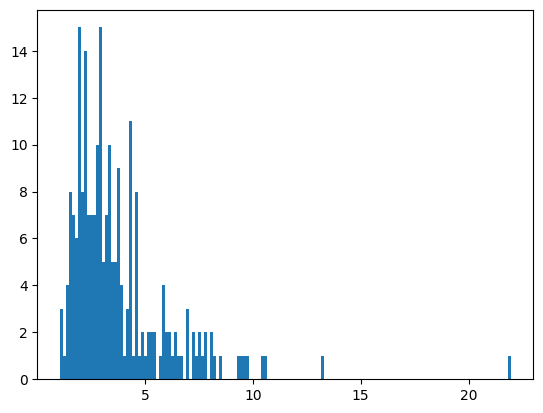

In [89]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crie um DataFrame vazio para armazenar as métricas finais

df_final_metrics_cv = pd.DataFrame()

# Defina a métrica que você está calculando (por exemplo, 'mae')
metric = 'mae'

# Lista das estatísticas que você deseja calcular
statistics = [
    'mean',
    'median',
    'std',
    'min',
    'max'
]

# Crie um objeto TimeSeriesSplit com o número de splits desejado
n_splits = 5  # Número de folds para cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Loop através das divisões da avaliação cruzada
for country in df3.columns:
    final_metrics_cv = pd.DataFrame()
    for train_idx, test_idx in tscv.split(train[country]):
        train_data = train[country].iloc[train_idx]
        test_data = train[country].iloc[test_idx]
        
        # Ajuste o modelo Simple Exponential Smoothing (SES)
        model_ses = SimpleExpSmoothing(train_data, initialization_method='estimated').fit()
        
        # Faça previsões no conjunto de teste
        forecast = model_ses.forecast(len(test_data))
        
        # Calcule a métrica desejada (MAE)
        mae = mean_absolute_error(test_data, forecast)
        
        # Adicione o MAE à lista de métricas
        final_metrics_cv = pd.concat([final_metrics_cv, pd.DataFrame({country: [mae]})], ignore_index=True)
    df_final_metrics_cv = pd.concat([df_final_metrics_cv, final_metrics_cv], axis=1)


aux = df_final_metrics_cv.mean()

print("mean mae for all countrys",aux.values.mean())
print("median mae for all countrys",np.median(aux.values))
print("std mae for all countrys",aux.values.std())
print("std mae for all countrys",aux.values.max())
print("std mae for all countrys",aux.values.min())
print("cv mae for all countrys",aux.values.std() / aux.values.mean())
plt.hist(aux.values, bins=150);

In [90]:
df_final_metrics_cv['Argentina'].mean()

5.482290081764523

## 5.2 Auto arima

mean mae for all countrys 3.6185197164891822
median mae for all countrys 3.022688031090322
std mae for all countrys 2.2329373541431314
std mae for all countrys 19.562123519079215
std mae for all countrys 1.0991255411988314
cv mae for all countrys 0.6170858608197961


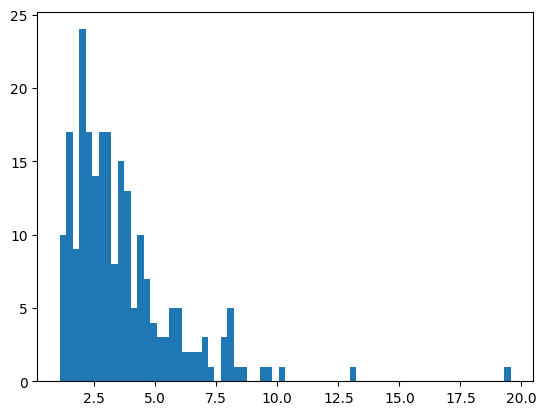

In [91]:
# Crie um DataFrame vazio para armazenar as previsões do SARIMA
df_final_metrics_cv = pd.DataFrame()

# Defina o número de splits desejado para a avaliação cruzada
n_splits = 5

# Crie um objeto TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Loop através das divisões da avaliação cruzada

    
    # Loop através das colunas (países)
for country in df3.columns:
    final_metrics_cv = pd.DataFrame()
    for train_idx, test_idx in tscv.split(train[country]):
        train_data = train[country].iloc[train_idx]
        test_data = train[country].iloc[test_idx]
        model_sarimax = auto_arima(
            train_data,
            m=1,
            test='adf',
            seasonal=False,
            stepwise=True,
            d=0,
            start_p=0,
            max_p=1,
            start_q=0,
            max_q=1,
        )
            
            
        pred_sarimax = model_sarimax.predict(len(test_data))

        mae = mean_absolute_error(test_data, pred_sarimax)

        final_metrics_cv = pd.concat([final_metrics_cv, pd.DataFrame({country: [mae]})], ignore_index=True)

    df_final_metrics_cv = pd.concat([df_final_metrics_cv, final_metrics_cv], axis=1)

aux = df_final_metrics_cv.mean()

print("mean mae for all countrys",aux.values.mean())
print("median mae for all countrys",np.median(aux.values))
print("std mae for all countrys",aux.values.std())
print("std mae for all countrys",aux.values.max())
print("std mae for all countrys",aux.values.min())
print("cv mae for all countrys",aux.values.std() / aux.values.mean())
plt.hist(aux.values, bins=70);


In [92]:
mean_absolute_error(test_data, pred_sarimax)

1.570044876697797

# 6.0 Fine tuning

## 6.1 Simple smothing

In [93]:
from sklearn.model_selection import  TimeSeriesSplit
from sklearn.pipeline import Pipeline
from statsmodels.tsa.api import SimpleExpSmoothing
# parameters grid
from sklearn.model_selection import ParameterGrid

In [94]:
tscv = TimeSeriesSplit(n_splits=n_splits)
df_countrys_paramns = pd.DataFrame()

param_grid = {
    'smoothing_level': list(np.arange(0.1, 1.1, 0.1)), 
    'initialization_method': ['estimated', 'heuristic'],
}

grid = ParameterGrid(param_grid)


for country in df3.columns:

    final_metrics_cv = pd.DataFrame()
    best_mae = float('inf')
    best_params = None
    std_mae = None

    for params in grid:
        for train_idx, test_idx in tscv.split(train[country]):
            train_data = train[country].iloc[train_idx]
            test_data = train[country].iloc[test_idx]
                
                # Ajuste o modelo Simple Exponential Smoothing (SES)
            model_ses = SimpleExpSmoothing(
                train[country],
                initialization_method=params['initialization_method'],                              
            ).fit(
                smoothing_level=params['smoothing_level'], 
                optimized=False
            )
                
                # Faça previsões no conjunto de teste
            forecast = model_ses.forecast(len(test_data))
                
                # Calcule a métrica desejada (MAE)
            mae = mean_absolute_error(test_data, forecast)
                
                # Adicione o MAE à lista de métricas
            final_metrics_cv = pd.concat([final_metrics_cv, pd.DataFrame({country: [mae]})], ignore_index=True)

        mean_mae_cv = final_metrics_cv.values.mean()
        std_mae_cv = final_metrics_cv.values.std()

        if mean_mae_cv < best_mae:
            best_mae = mean_mae_cv
            best_params = params
            std_mae = std_mae_cv
        
            
        # create dataframe with mean mae, country and best_paramns
    df_countrys_paramns = pd.concat([
        df_countrys_paramns, 
        pd.DataFrame({
            'country': [country], 
            'mean_mae': [best_mae], 
            'std_mae': [std_mae],
            'best_params': [best_params]})
        ], 
        ignore_index=True
    )

mean mae for all countrys 3.3249841518204786
median mae for all countrys 2.674279170759829
std mae for all countrys 2.3456604611786154
std mae for all countrys 19.461103887247873
std mae for all countrys 0.9728609536836569
cv mae for all countrys 0.7054651553434717


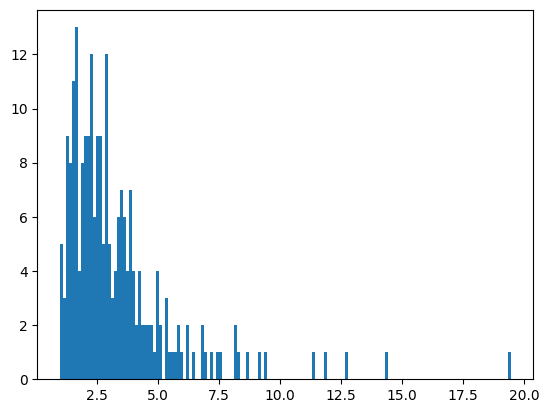

In [95]:
df_countrys_paramns['mean_mae'].std()
print("mean mae for all countrys",df_countrys_paramns['mean_mae'].mean())
print("median mae for all countrys",np.median(df_countrys_paramns['mean_mae']))
print("std mae for all countrys",df_countrys_paramns['mean_mae'].std())
print("std mae for all countrys",df_countrys_paramns['mean_mae'].max())
print("std mae for all countrys",df_countrys_paramns['mean_mae'].min())
print("cv mae for all countrys",df_countrys_paramns['mean_mae'].std() / df_countrys_paramns['mean_mae'].mean())
plt.hist(df_countrys_paramns['mean_mae'], bins=150);

# 7.0 final predict

In [96]:
df4 = df_raw.copy()

In [97]:
df4.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,4.206173,2.7,-5.4,-1.732417,2.4,8.2,0.7,2.776923,8.187232,2.9,...,-0.8,3.3,3.487831,1.8,6.4,0.9,-1.9,3.8,1.917685,2.1
1981-01-01,7.200000,5.7,3.0,-3.196477,-4.4,3.8,-5.7,1.478698,7.687026,4.1,...,-0.5,1.9,0.914286,0.1,0.9,2.0,-0.2,4.2,1.732500,1.9
1982-01-01,5.116667,2.9,6.4,-2.925252,0.0,-0.1,-3.1,0.180473,6.675762,0.1,...,1.4,1.5,1.242857,0.6,-0.5,-0.1,0.4,2.2,1.950000,0.7
1983-01-01,4.283333,1.1,5.4,-2.284511,4.2,5.4,3.7,-1.117751,8.090579,-0.5,...,4.6,1.8,1.607143,1.7,-2.8,3.3,0.7,4.0,1.272500,2.6
1984-01-01,6.166667,2.0,5.6,-1.317845,6.0,10.2,2.0,-2.415976,10.046980,6.3,...,4.1,4.1,2.621429,2.5,3.9,5.0,0.3,6.6,2.080000,4.6


## 7.1 train test split

In [98]:
test_years = 5
train = df4[:-test_years]
test = df4[-test_years:]

## 7.2 train abd predict for individual country

In [99]:
predict = pd.DataFrame()
for country in df4.columns:
    parmans = df_countrys_paramns[df_countrys_paramns['country'] == country]['best_params'].values[0]
    model = SimpleExpSmoothing(
        train[country], 
        initialization_method=parmans['initialization_method']
    ).fit(
        smoothing_level=parmans['smoothing_level'], 
        optimized=False
    )
    
    forecast = model.forecast(len(test))
    
    predict = pd.concat([predict, pd.DataFrame(forecast, columns=[country])], axis=1)

In [100]:
predict

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
2024-01-01,4.836186,3.183764,2.6,1.199466,2.686904,5.5,1.685536,5.692273,3.064797,2.594361,...,2.564438,4.407267,1.649044,1.761341,2.10111,1.59363,3.290659,2.766342,3.59448,3.210106
2025-01-01,4.836186,3.183764,2.6,1.199466,2.686904,5.5,1.685536,5.692273,3.064797,2.594361,...,2.564438,4.407267,1.649044,1.761341,2.10111,1.59363,3.290659,2.766342,3.59448,3.210106
2026-01-01,4.836186,3.183764,2.6,1.199466,2.686904,5.5,1.685536,5.692273,3.064797,2.594361,...,2.564438,4.407267,1.649044,1.761341,2.10111,1.59363,3.290659,2.766342,3.59448,3.210106
2027-01-01,4.836186,3.183764,2.6,1.199466,2.686904,5.5,1.685536,5.692273,3.064797,2.594361,...,2.564438,4.407267,1.649044,1.761341,2.10111,1.59363,3.290659,2.766342,3.59448,3.210106
2028-01-01,4.836186,3.183764,2.6,1.199466,2.686904,5.5,1.685536,5.692273,3.064797,2.594361,...,2.564438,4.407267,1.649044,1.761341,2.10111,1.59363,3.290659,2.766342,3.59448,3.210106


## 7.4 Save to csv

In [101]:
predict.to_csv(path + 'data/predict.csv')